In [1]:
import numpy as np
import pylab as pb
import GPy
import copy as cp

import pickle

pb.ion()

#file_base = "modularized_v5_backup/"
file_base = ""

In [2]:
# In this cell, assign m to some serially-loaded trained GPy
# emulator

In [3]:
X_raw = np.load(file_base + "hc_massless_test_actual.npy",
    allow_pickle=True)
Y_raw = np.load(file_base + "samples_massless_test.npy",
    allow_pickle=True)

In [4]:
scales = np.load("standard_k.npy", allow_pickle=True)

In [5]:
def is_bad(row):
    if float('-inf') in row or float('inf') in row \
        or None in row or True in np.isnan(pspec) \
        or 0 in row:
        return True
    return False

bad_row_indices = []
for i in range(len(Y_raw)):
    pspec = Y_raw[i]
    if is_bad(pspec):
        bad_row_indices.append(i)

X = np.delete(X_raw, bad_row_indices, 0)
Y = np.delete(Y_raw, bad_row_indices, 0)

In [6]:
m = pickle.load(open("analyses/massless_emulator.nucomet", "rb"))

In [7]:
def inverse_transform(raw_prediction):
    return np.exp(raw_prediction * m.stdev + m.mu)

In [8]:
def nest(array):
    return np.array([np.array(array)])

In [9]:
preds = np.zeros(Y.shape)
rel_errors = np.zeros(Y.shape)

for i in range(len(X)):
    x = nest(X[i])
    raw_pred, _ = m.predict(x)
    preds[i] = inverse_transform(raw_pred)
    rel_errors[i] = (preds[i] - Y[i]) / Y[i]

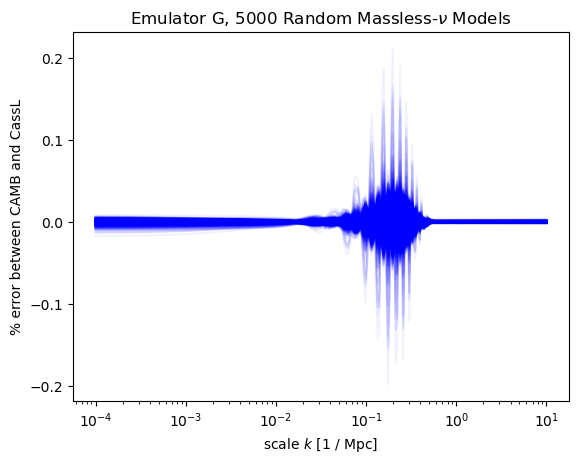

In [23]:
for i in range(len(rel_errors)):
    if i % 1 == 0: # plot one out of every one hundred errors
        pb.plot(scales, 100 * rel_errors[i],
            color='blue', alpha=0.05)
        pb.xscale('log')
        
pb.title(r"Emulator G, 5000 Random Massless-$\nu$ Models")
pb.ylabel("% error between CAMB and CassL")
pb.xlabel("scale $k$ [1 / Mpc]")
pb.savefig("../plots/emulator/performance/massless_5k.png")